In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.fft import fft, ifft,fftshift
import control
import sympy as sp

!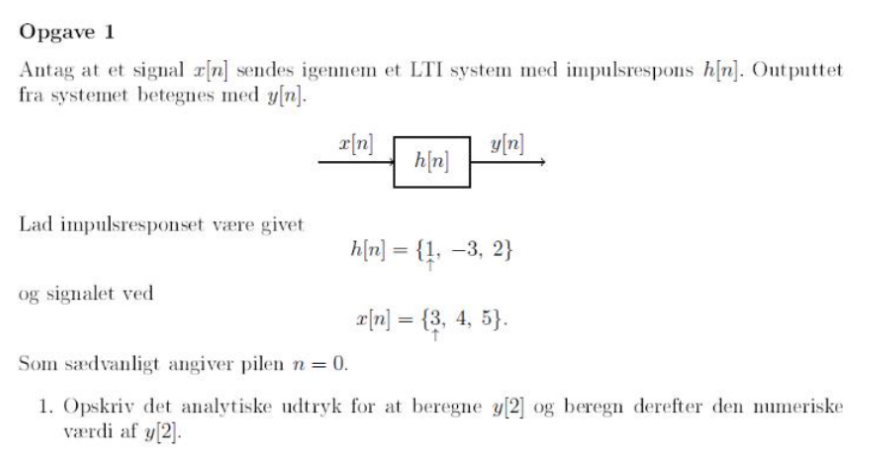
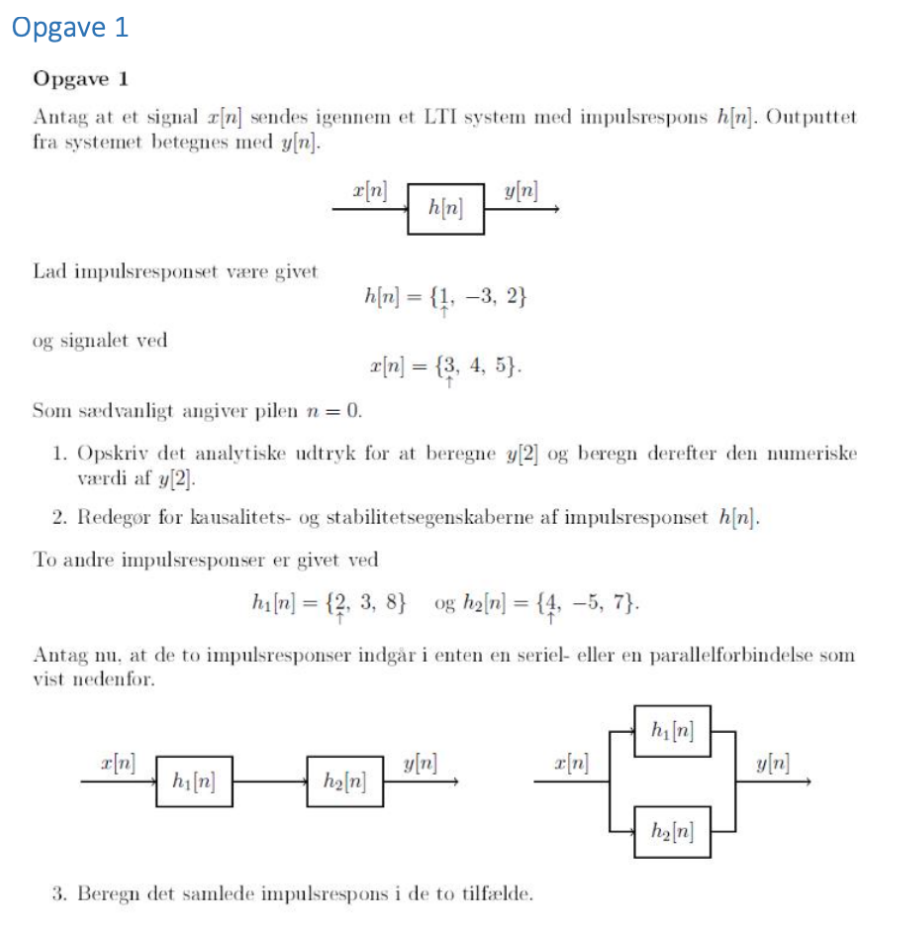

Da talen er om et LTI system vil outputtet være givet med convolution af input signalet x[n] og impulsresponset h[n] d.v.s

$$y[n]=x[n]*h[n]=\sum_{k=-\infty} ^{\infty} x[k]\cdot h[n-k]$$

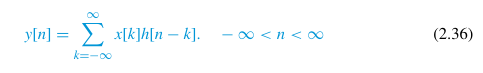

d.v.s y[2] er givet ved $y[2]=\sum_{k=-\infty} ^{\infty} x[k]\cdot h[2-k]$

for at beregne y[2] flipper jeg h[n] om y aksen således at h[-n]={2,-3,1}, hvor n=0 ved h[-n]=1, derefter kan jeg trække h[2-n] hen over x[n], således at y[2] kan regnes

\begin{align*}
y[2]&=x[0]\cdot h[2]+x[1]\cdot h[1]+x[2]\cdot h[0]\\
&=3\cdot 2+4\cdot (-3)+5\cdot 1\\
&=6-12+5\\
&=-1\\
\end{align*}

In [18]:
h=np.array([1,-3,2])
x=np.array([3,4,5])
np.convolve(x,h)

array([ 3, -5, -1, -7, 10])

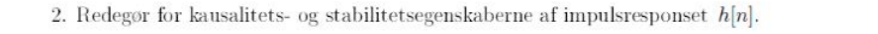

Da den første værdi af h[n] er givet ved n=0, er h[n] kausalt og derfor højresidet, da h[n] er et finite længde signal er det også stabilt.  
  
   da ROC for et finite længde signal er givet ved hele z-planen, med mulige undtagelser for $z\neq 0$ eller $z \neq \infty$

i dette tilfælde er $H(z)=1-3z^{-1}+2z^{-2}$ og ROC er derfor $z \neq 0$, da H(0) er udefineret

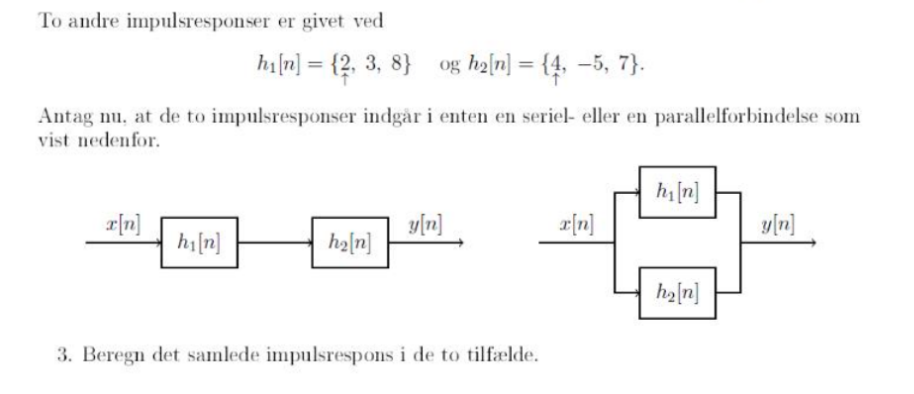

Da systemet er LTI, og convolution både er kommukativ og distrubitiv vil det første gælde at

$$h[n]=h_1[n]*h_2[n]$$

In [19]:
h1=np.array([2,3,8])
h2=np.array([4,-5,7])
np.convolve(h1,h2)

array([  8,   2,  31, -19,  56])

$$h[n]=\{8,2,31,-19,56\}$$

hvor h[n]=8 for n=0, da der ikke er nogen forsinkelse

I det næste tilfælde bliver distrubitiv lov brugt hvor

$$h[n]=h_1[n]+h_2[n]$$

d.v.s

$$h[n]=\{2+4,3-5,8+7\}=\{6,-2,15\}$$

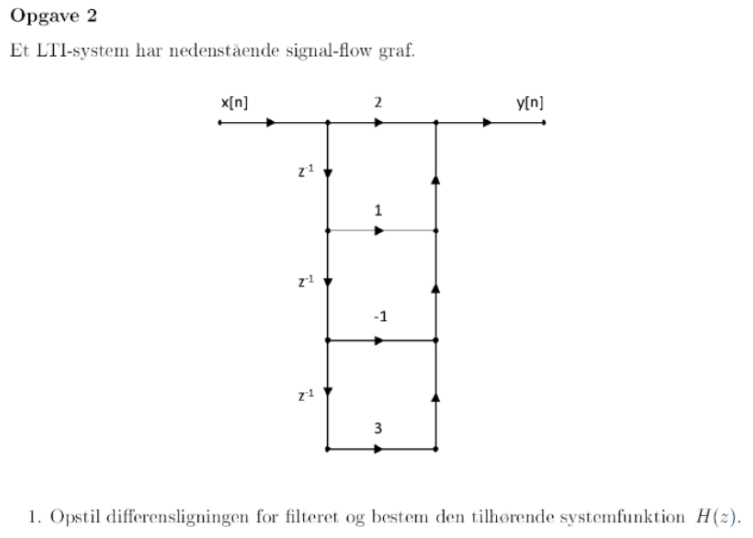

Da der kun kommer tidsforsinkelser og multiplikationer på input signalet, kommer der ikke til at være nogle poler, og der kommer til at være 3 nulpunkter, da der kommer 3 forsinkelser

differens ligning kan skrives således:  
$$y[n]=2x[n]+x[n-1]-x[n-2]+3x[n-3]$$

For at finde $H(z)$ bliver z-transform taget af differensligningen

\begin{align*}
Y(z)&=2X(z)+z^{-1}X(z)-z^{-2}X(z)+3z^{-3}X(z)\\
&=X(z)(2+z^{-1}-z^{-2}+3z^{-3})\\\\
H(z)&=\frac{Y(z)}{X(z)}=2+z^{-1}-z^{-2}+3z^{-3}\\
\end{align*}


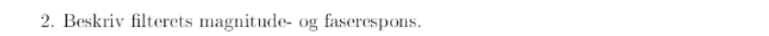

Da der ikke er nogle poler i filteret (udover $z=0$) er det stabilt, og kan derfor evalueres på enheds cirklen hvor $H(e^{jw})=H(z)\rvert _{z=e^{jw}}$, hvilket giver  
  
$$H(e^{jw})=2+e^{-jw}-e^{-2jw}+3e^{-3jw}$$

hvor magnitude og faseresponset nu kan plottes

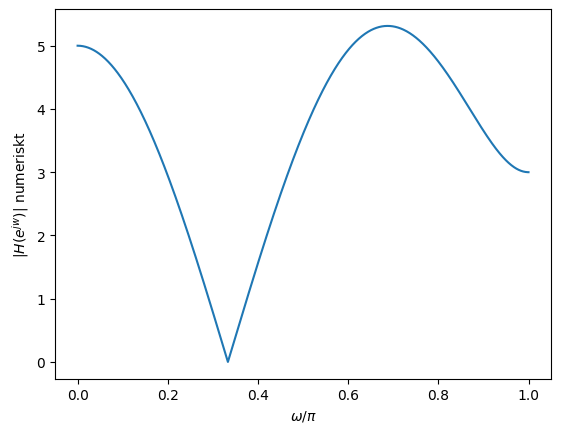

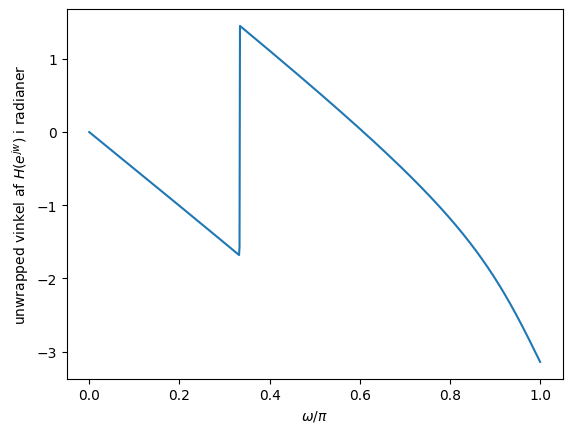

In [23]:
def H(omega):
    return 2+np.exp(-1j*omega)-np.exp(-2j*omega)+3*np.exp(-3j*omega)
o=np.linspace(0,np.pi,1000)

plt.plot(o/np.pi,abs(H(o)))
plt.xlabel("$\omega / \pi$")
plt.ylabel("$|H(e^{jw})|$ numeriskt")
plt.show()
plt.plot(o/np.pi,np.unwrap(np.angle(H(o))))
plt.xlabel("$\omega / \pi$")
plt.ylabel("unwrapped vinkel af $H(e^{jw})$ i radianer")
plt.show()


Ved at aflæse magnitude responset kan man se at der kommmer et gain på næsten alle frekvenser undtaget dem omkring 0.3 pi, hvilket ligner et slags bandstop filter

ved at aflæse faseplottet, kan man se at fasen stort set er linæer for lavere frekvenser, men ved højere frekvenser stopper den med at være lineær

dette tyder på at grup delayet for lavere frekvenser er konstant, men ikke for højere frekvenser, hvilket vil gøre at højere frekvenser er sværer at aflæse efter systemet, da fasen ændringen ikke er konstant

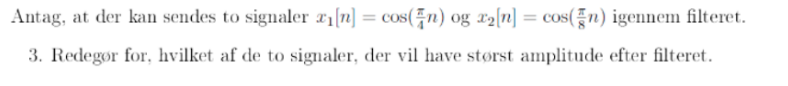

dette kan ses ved at sætte $\pi /4$ og $\pi /8 $ ind i $H(e^{jw})$ hvor magnituden plottes

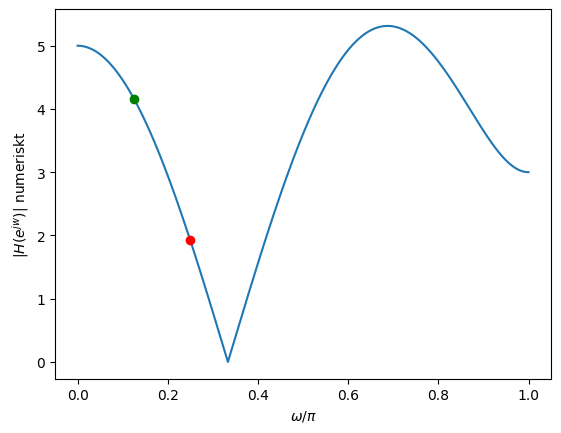

In [14]:
plt.plot(o/np.pi,abs(H(o)))
plt.plot(1/4,abs(H(np.pi/4)),marker='o',color='r')
plt.plot(1/8,abs(H(np.pi/8)),marker='o',color='g')
plt.xlabel("$\omega / \pi$")
plt.ylabel("$|H(e^{jw})|$ numeriskt")
plt.show()


Her er frekvensen for x_1[n] det grønne punkt og x_2[n] er det røde punkt

Her er det åbenlyst at x_1[n], kommer til at have en større amplitude efter filtrer

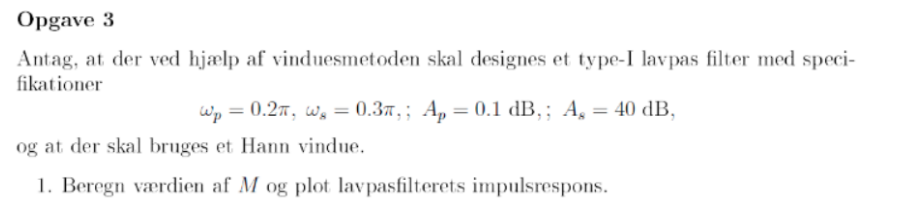

Da der skal designes et type 1 filter skal både h[k] og M være lige

M kan findes ved at finde det mindste L, der opfylder kravene for pass- og stopband-frekvenserne, hvor $\Delta w = w_p -w_s=0.1\pi$

nu bruges table 10.3 hvor den eksakte $\Delta w$ for Hann vinduet er givet ved:
$$6.2\pi/L=\Delta w\implies L=6.2\pi/\Delta w =6.2/0.1=62$$

hvilket giver M=61

Dette vil ikke give et type 1 filter da dette M er ulige.

Derfor sættes M=62

Dette plottes i matlab

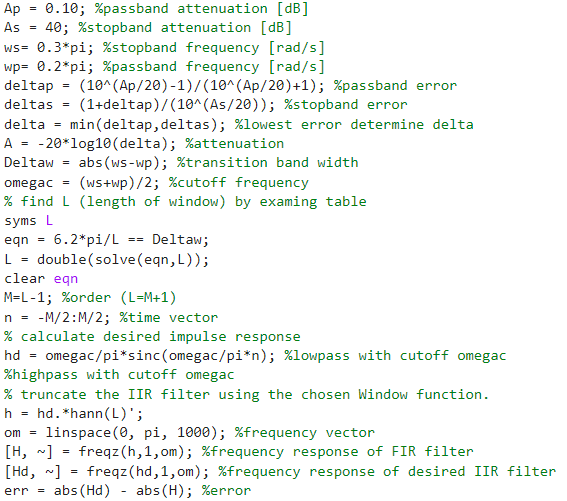

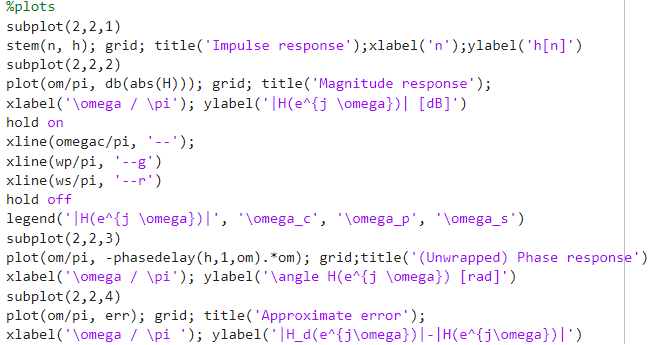

Impuls responsen kan ses øverst til højre her:

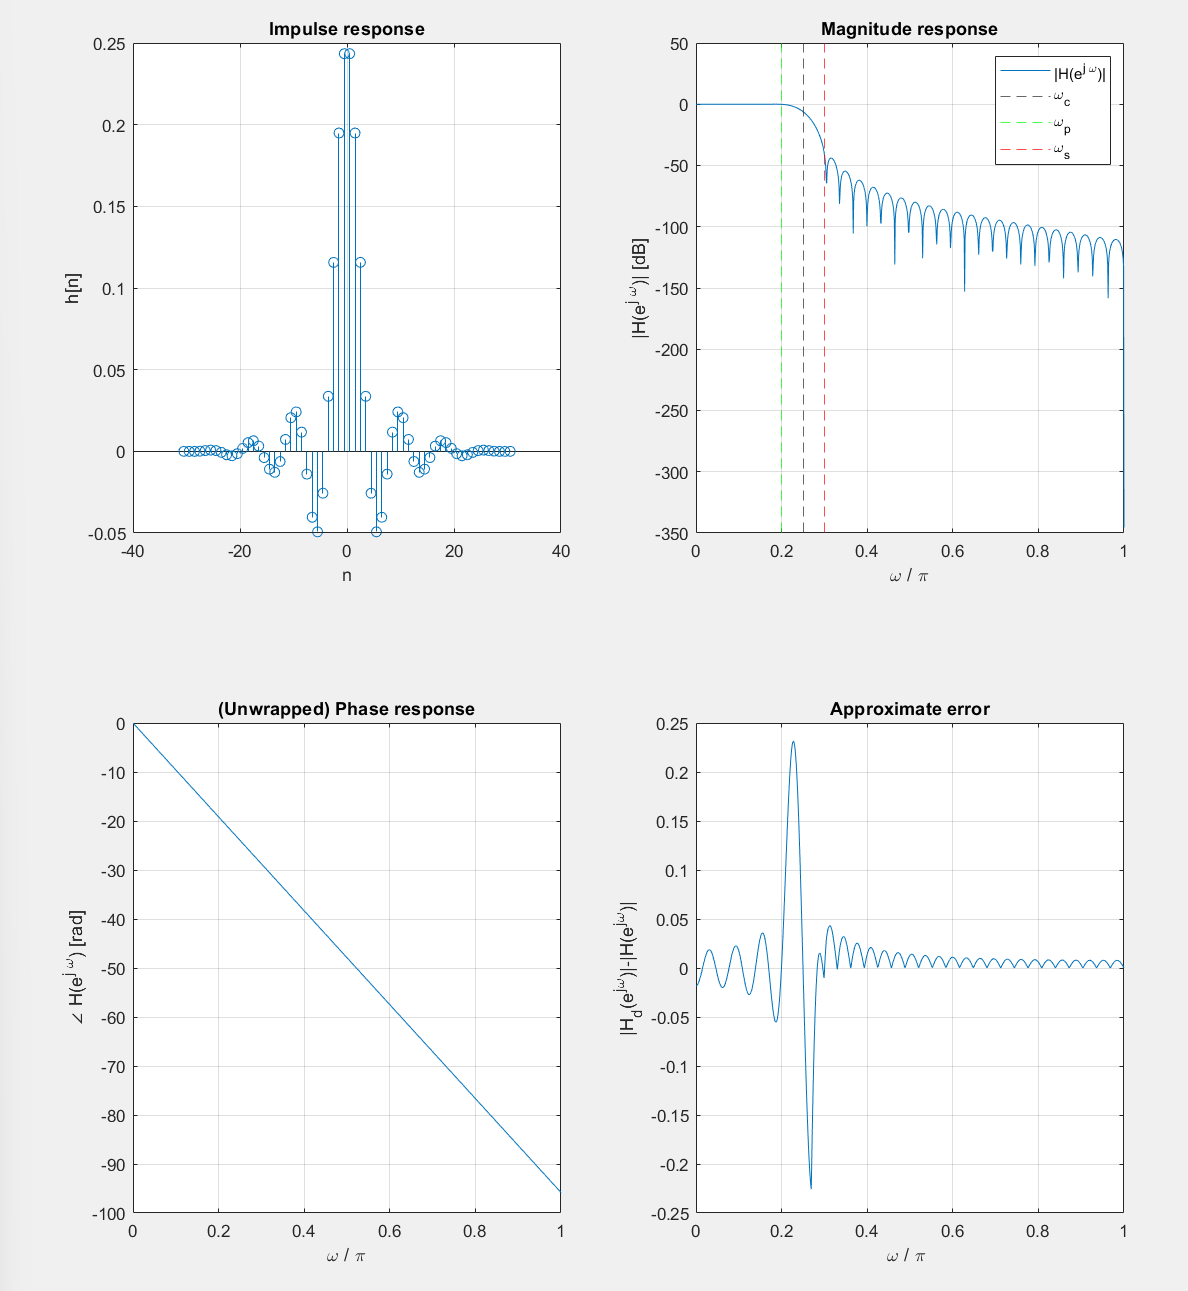

Her kan det ses at impulseresponsen er symmetrisk, og da M er lige, er dette et type I FIR filter.

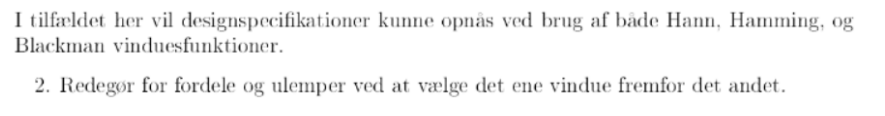

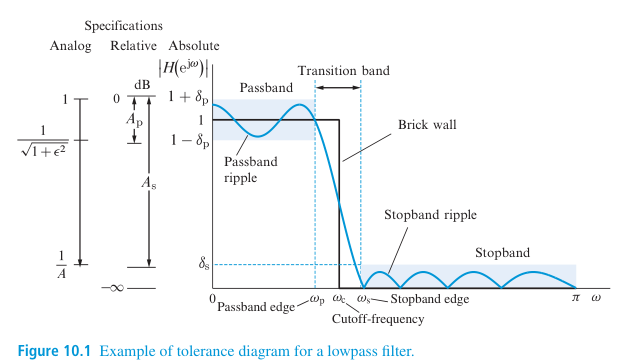

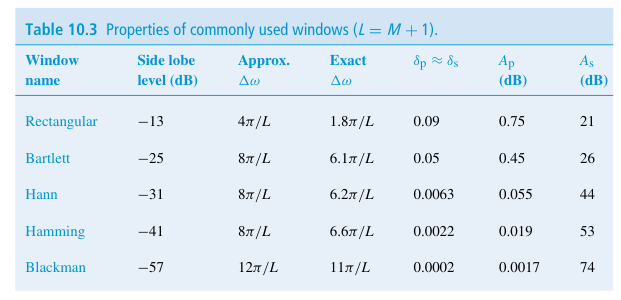

Ved at aflæse figur 10.1 og table 10.3 kan fordelene og ulemperne for de forskellige vinduer ses

Hvor Hann har bedst transition bånd, Blackmann har bedst pass og stopbånd, og Hamming ligger mit imellem de to andre

d.v.s i dette tilfælde hvor vi skal holde kravet $\Delta w =0.1\pi$ vil filter ordenen, på Hamming og Blackman filtrene være højere, især for Blackman filteret. Dette vil give højere group delay, som medfører et langsommere signal

d.v.s at hann vinduet, giver mest støj og mindst delay  
  

Blackman giver mindst støj og mest delay  
  
Og Hamming ligger imellem de to

d.v.s hvis man ønsker minimal støj, så skal man vælge Blackman vinduet
  
Og hvis man ønsker minimalt delay, så skal man vælge Hann vinduet  
  
Og hvis man ønsker mindre støj end Hann vinduet, men mindre delay end Blackman vinduet, så skal man vælge Hamming vinduet

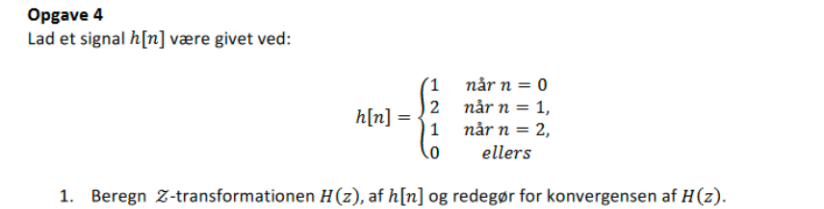

z transform er givet med

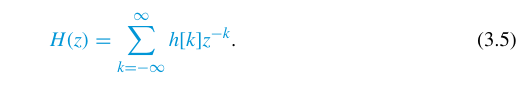

Da h[n] er lig 0 udenfor intervallet $0\leq n \leq 2$ akn H(z), regnes som

\begin{align*}
H(z)&= \sum _{k=0} ^{2} h[k]z^{-k}\\
&=1+2z^{-1}+z^{-2}
\end{align*}

I dette tilfælde er ROC: $z \neq 0$, da H(0) ikke konvergerer. D.v.s konvergensen af H(Z) er hele z-planen untaget $z=0$

Da der ikke er nogen pol udenfor enhedscirklen kan $H(e^{jw})$ findes via $H(z)\rvert{} _{z=e^{jw}}$:

\begin{align*}
H(e^{jw})&=1+2e^{-jw}+e^{-2jw}\\
&=(1+2cos(-w)+cos(-2w))+j(2sin(-w)+sin(-2w))\\
&=(1+2cos(w)+cos(2w))-j(2sin(w)+sin(2w))\\\\

|H(e^{jw})|&=|(1+2cos(w)+cos(2w))-j(2sin(w)+sin(2w))|\\
&=\sqrt{(1+2cos(w)+cos(2w))^2+(2sin(w)+sin(2w))^2}
\end{align*}

Dette kan skitses som

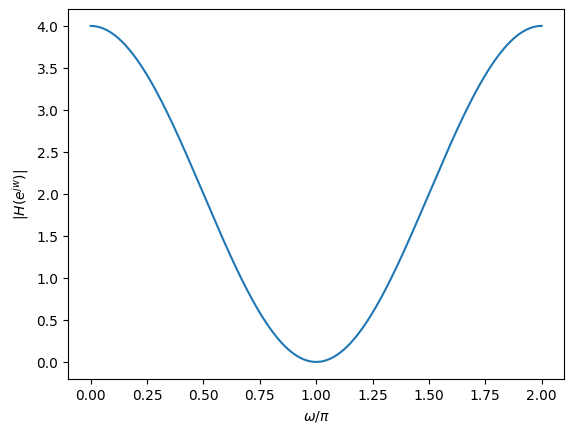

In [15]:
def absH(omega):
    return np.sqrt((1+2*np.cos(omega)+np.cos(2*omega))**2+(2*np.sin(omega)+np.sin(2*omega))**2)
o=np.linspace(0,2*np.pi,1000)
plt.plot(o/np.pi,absH(o))
plt.xlabel("$\omega / \pi$")
plt.ylabel("$|H(e^{jw})|$")
plt.show()

Her er det tydeligt at $H(e^{jw})$ forstærker lavere frekvenser

Det er også tydeligt at $|H(e^{jw})|$ er periodiskt, hvilket giver god mening da DTFT er periodiskt per defintion, og det giver derfor god mening at dens magnitude også er periodisk.

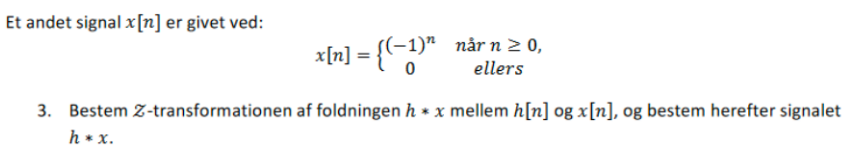

Ved brug af tabel 3.1, kan jeg se at  
$$X(z)=\frac{1}{1+z^{-1}}$$  
  
med ROC: $|z|>1$

foldning i z-domæne er lig multiplikation, som ses i tabel 3.2, d.v.s  
  
$$Z\{h*x\}=H(z)X(z)=\frac{1+2z^{-1}+z^{-2}}{1+z^{-1}}=z^{-1}+1$$

For at finde signalet $h*x$, bruges tabel 3.1  og tabel 3.2, hvor
  
\begin{align*}
h[n]*x[n]&=\delta [n-1]+\delta [n]\\
        &=\{1,1 \}
\end{align*}

hvor n=0 er det første index

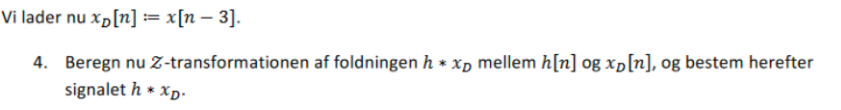

ved brug af property 2. i tabel 3.2

\begin{align*}
X_d(z) &=z^{-3}X(z)\\\\
H(z)X_d(z)&=z^{-3}X(z)H(Z)\\
&=z^{-3}(z^{-1}+1)\\
&=z^{-4}+z^{-3}
\end{align*}

ved at tage invers z-transformet, bliver signalet

\begin{align*}
h[n]*x_d[n]&=\delta [n-4]+\delta [n-3]\\
&=\{0,0,0,1,1\}
\end{align*}

hvor det første index er n=0, d.v.s at foldning af $h[n]$ og $x_d[n]$ svarer til foldning af $h[n]$ og $x[n]$ tidsforsinket med et delay på 3

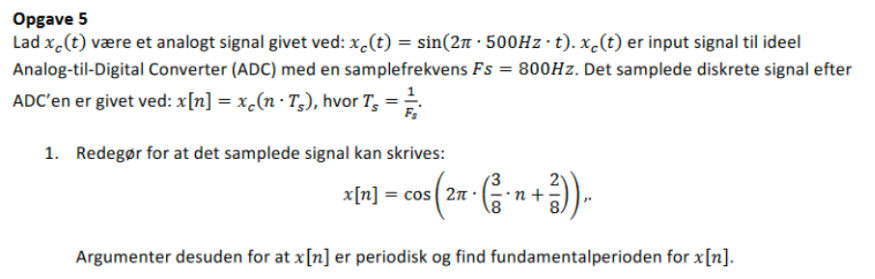

\begin{align*}
x[n]&=x_c [nT_s]\\
    &=\sin(2\pi \frac{500}{800}n)\\
    &=\sin(2\pi \frac{5}{8}n)\\
    &=\cos(\pi/2 -2\pi \frac{5}{8}n)\\

\end{align*}

Her antager jeg at signalet er periodiskt (udled hvis der er tid til det). Her efter bruger jeg nogle trigonometriske egenskaber så som:  
  
 $$cos(\pi/2-x)=sin(x)$$
 $$cos(x)=cos(-x)$$
 $$cos(x)=cos(x+2\pi x)$$


\begin{align*}
    &=\cos(\pi/2 -2\pi \frac{5}{8}n)\\
    &=\cos(2\pi(\frac{2}{8} -\frac{5}{8}n))\\
    &=\cos(2\pi(\frac{2}{8} -\frac{5}{8}n))\\
    &=\cos(2\pi(\frac{2}{8} -\frac{5}{8}n)-2\pi(n+1))\\
    &=\cos(2\pi(\frac{2}{8} -\frac{5}{8}n)+2\pi n)\\
    &=\cos(2\pi(\frac{2}{8} +\frac{3}{8}n))\\
    &=\cos(2\pi(\frac{3}{8}n+2/8))\\

\end{align*}

fundamental perioden for x[n] er givet ved det N hvor$x[n]=x[n+N]$:
\begin{align*}
    \cos(2\pi(\frac{3}{8}n+2/8))&=\cos(2\pi(\frac{3}{8}(n+N)+2/8))\\
    \cos(\frac{6\pi}{8}n+4\pi/8)&=\cos(\frac{6\pi}{8}(n+N)+4\pi/8)\\
    \cos(\frac{6\pi}{8}n+4\pi/8)&=\cos(\frac{6\pi}{8}n+\frac{6\pi}{8}N+4\pi/8)\\
    \cos(\frac{6\pi}{8}n+4\pi/8+2\pi k)&=\cos(\frac{6\pi}{8}n+\frac{6\pi}{8}N+4\pi/8)\\
2\pi k&=\frac{6\pi}{8}N\\
N=\frac{2\pi k}{\frac{6\pi}{8}}\\
\end{align*}

\begin{align*}
N=\frac{2\pi k}{\frac{6\pi}{8}}\\
N=\frac{2\pi 8 k}{6\pi}\\
N=\frac{ 8}{3} k\\


\end{align*}

hvor k er et heltal og N skal være det mindst mulige heltal d.v.s k=3, giver det mindst mulige heltal for $N=8$

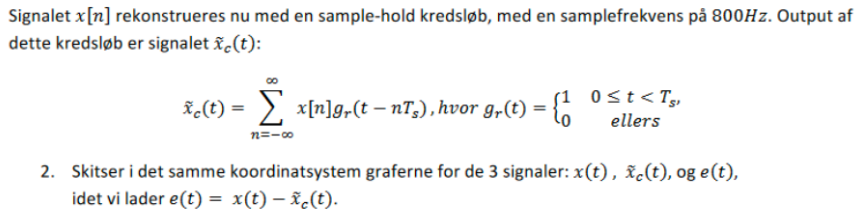

Her er en grov skitse af x(t), $\overset{\sim}{x_c}(t)$ og e(t), hvor hver "streg" i $\overset{\sim}{x_c}(t)$ er Ts lang

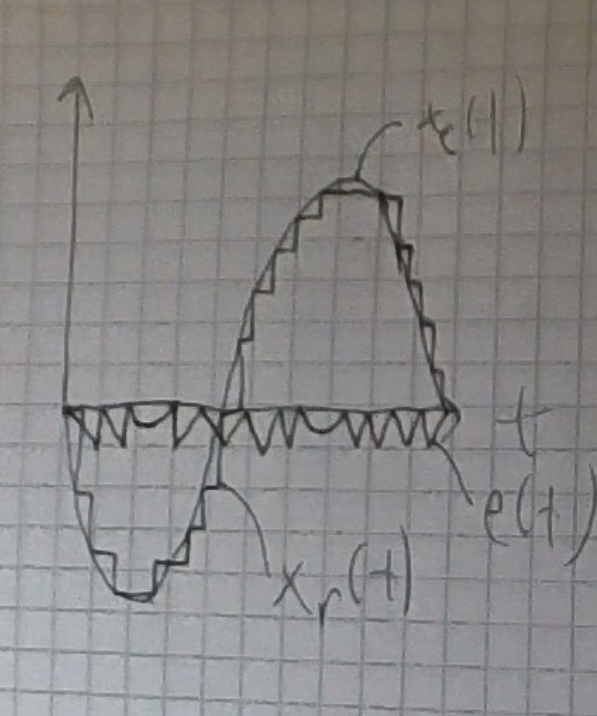

Da $g_r(t)$, er interpolations funktionen for en zero order hold, holder man på det forrige signal i Ts sekunder hvorefter man får et nyt sample af x(t), som man så holder på i Ts sekunder osv.


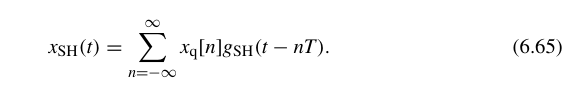

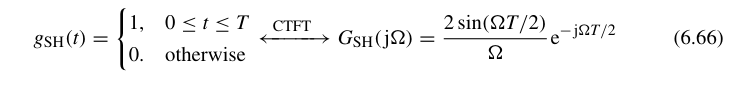

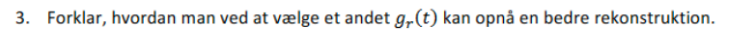

$g_r(t)$ er interpolationsfunktionen, der i dette tilfælde er en zero order hold. hvis man lader $g_r(t)=g_{BL}=sinc (\pi t/Ts)$ , så kunne man teoretiskt set rekonstruere signalet helt perfekt, med en ideal DAC.

Denne er dog praktiskt umilig at implementere $g_{BL}$ så den approksimeres da $g_{BL}$ ikke er causal.